# Análise de dados sobre canais do YouTube em Python

Esta análise irá explorar o conjunto de dados [GLOBAL_YOUTUBE_STATISTICS_2023](https://www.kaggle.com/datasets/nelgiriyewithana/global-youtube-statistics-2023), existente no Kaggle.

O objetivo é descobrir:
* Quais seriam as melhores categorias a serem abordadas no YouTube; 
* As estatísticas dos canais da plataforma, tais como sua idade, maiores ganhos e o total de visualizações de vídeos;
* Verificar dados da população do país de origem do canal.

Este projeto foi realizado para fins de prática sobre a Análise exploratória de dados (EDA) na linguagem python, por isso poderá haver passos que priorizem mais a aplicação de fórmulas do que a análise em si.

Sumário:
* Importando bibliotecas e lendo o conjunto de dados;
* Explorando e limpando os dados: 
    * Conhecendo o contexto geral dos dados;
    * Transformando os dados;
    * Convertendo números para melhor visualização;
    * Trabalhando com datas;
    * Explorando os dados por categorias;
    * Quantidade de visualizações de vídeos


## Importando bibliotecas e lendo o conjunto de dados

In [32]:
#importando bibliotecas
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import datetime as dt

In [33]:
# Lendo o conjunto de dados
data = pd.read_csv('Global YouTube Statistics.csv', encoding='unicode_escape')

## Explorando e limpando os dados

### Conhecendo o contexto geral dos dados

In [3]:
# visualizando o conjunto de dados
data.head()

,rank,Youtuber,subscribers,video views,category,Title,uploads,Country,Abbreviation,channel_type,...,subscribers_for_last_30_days,created_year,created_month,created_date,Gross tertiary education enrollment (%),Population,Unemployment rate,Urban_population,Latitude,Longitude
0,1,T-Series,245000000,2.280000e+11,Music,T-Series,20082,India,IN,Music,...,2000000.0,2006.0,Mar,13.0,28.1,1.366418e+09,5.36,471031528.0,20.593684,78.962880
1,2,YouTube Movies,170000000,0.000000e+00,Film & Animation,youtubemovies,1,United States,US,Games,...,NaN,2006.0,Mar,5.0,88.2,3.282395e+08,14.70,270663028.0,37.090240,-95.712891
2,3,MrBeast,166000000,2.836884e+10,Entertainment,MrBeast,741,United States,US,Entertainment,...,8000000.0,2012.0,Feb,20.0,88.2,3.282395e+08,14.70,270663028.0,37.090240,-95.712891
3,4,Cocomelon - Nursery Rhymes,162000000,1.640000e+11,Education,Cocomelon - Nursery Rhymes,966,United States,US,Education,...,1000000.0,2006.0,Sep,1.0,88.2,3.282395e+08,14.70,270663028.0,37.090240,-95.712891
4,5,SET India,159000000,1.480000e+11,Shows,SET India,116536,India,IN,Entertainment,...,1000000.0,2006.0,Sep,20.0,28.1,1.366418e+09,5.36,471031528.0,20.593684,78.962880


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 995 entries, 0 to 994
Data columns (total 28 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   rank                                     995 non-null    int64  
 1   Youtuber                                 995 non-null    object 
 2   subscribers                              995 non-null    int64  
 3   video views                              995 non-null    float64
 4   category                                 949 non-null    object 
 5   Title                                    995 non-null    object 
 6   uploads                                  995 non-null    int64  
 7   Country                                  873 non-null    object 
 8   Abbreviation                             873 non-null    object 
 9   channel_type                             965 non-null    object 
 10  video_views_rank                         994 non-n

In [4]:
#removendo valores duplicados
data.drop_duplicates().shape

(995, 28)

In [6]:
# verificando a existência de valores nulos
data.isnull().sum()

rank                                         0
Youtuber                                     0
subscribers                                  0
video views                                  0
category                                    46
Title                                        0
uploads                                      0
Country                                    122
Abbreviation                               122
channel_type                                30
video_views_rank                             1
country_rank                               116
channel_type_rank                           33
video_views_for_the_last_30_days            56
lowest_monthly_earnings                      0
highest_monthly_earnings                     0
lowest_yearly_earnings                       0
highest_yearly_earnings                      0
subscribers_for_last_30_days               337
created_year                                 5
created_month                                5
created_date 

In [7]:
# descobrindo a média de valores que estão faltando
data.isna().mean()

rank                                       0.000000
Youtuber                                   0.000000
subscribers                                0.000000
video views                                0.000000
category                                   0.046231
Title                                      0.000000
uploads                                    0.000000
Country                                    0.122613
Abbreviation                               0.122613
channel_type                               0.030151
video_views_rank                           0.001005
country_rank                               0.116583
channel_type_rank                          0.033166
video_views_for_the_last_30_days           0.056281
lowest_monthly_earnings                    0.000000
highest_monthly_earnings                   0.000000
lowest_yearly_earnings                     0.000000
highest_yearly_earnings                    0.000000
subscribers_for_last_30_days               0.338693
created_year

In [34]:
df_dados_nulos_canal = pd.isnull(data)
df_dados_nulos_canal.head(10)

,rank,Youtuber,subscribers,video views,category,Title,uploads,Country,Abbreviation,channel_type,...,subscribers_for_last_30_days,created_year,created_month,created_date,Gross tertiary education enrollment (%),Population,Unemployment rate,Urban_population,Latitude,Longitude
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,True,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
5,False,False,False,False,True,False,False,True,True,False,...,True,False,False,False,True,True,True,True,True,True
6,False,False,False,False,False,False,False,False,False,False,...,True,False,False,False,False,False,False,False,False,False
7,False,False,False,False,False,False,False,False,False,False,...,True,False,False,False,False,False,False,False,False,False
8,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
9,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


Excluir os dados nulos também irá excluir outras informações por isso, nesse momento, eles serão mantidos.

In [9]:
# Organizando dados pelo número de inscritos, do maior para o menor
data.sort_values(by=['subscribers'], ascending=False)

,rank,Youtuber,subscribers,video views,category,Title,uploads,Country,Abbreviation,channel_type,...,subscribers_for_last_30_days,created_year,created_month,created_date,Gross tertiary education enrollment (%),Population,Unemployment rate,Urban_population,Latitude,Longitude
0,1,T-Series,245000000,2.280000e+11,Music,T-Series,20082,India,IN,Music,...,2000000.0,2006.0,Mar,13.0,28.1,1.366418e+09,5.36,471031528.0,20.593684,78.962880
1,2,YouTube Movies,170000000,0.000000e+00,Film & Animation,youtubemovies,1,United States,US,Games,...,NaN,2006.0,Mar,5.0,88.2,3.282395e+08,14.70,270663028.0,37.090240,-95.712891
2,3,MrBeast,166000000,2.836884e+10,Entertainment,MrBeast,741,United States,US,Entertainment,...,8000000.0,2012.0,Feb,20.0,88.2,3.282395e+08,14.70,270663028.0,37.090240,-95.712891
3,4,Cocomelon - Nursery Rhymes,162000000,1.640000e+11,Education,Cocomelon - Nursery Rhymes,966,United States,US,Education,...,1000000.0,2006.0,Sep,1.0,88.2,3.282395e+08,14.70,270663028.0,37.090240,-95.712891
4,5,SET India,159000000,1.480000e+11,Shows,SET India,116536,India,IN,Entertainment,...,1000000.0,2006.0,Sep,20.0,28.1,1.366418e+09,5.36,471031528.0,20.593684,78.962880
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
990,991,Natan por Aï¿,12300000,9.029610e+09,Sports,Natan por Aï¿,1200,Brazil,BR,Entertainment,...,700000.0,2017.0,Feb,12.0,51.3,2.125594e+08,12.08,183241641.0,-14.235004,-51.925280
991,992,Free Fire India Official,12300000,1.674410e+09,People & Blogs,Free Fire India Official,1500,India,IN,Games,...,300000.0,2018.0,Sep,14.0,28.1,1.366418e+09,5.36,471031528.0,20.593684,78.962880
992,993,Panda,12300000,2.214684e+09,NaN,HybridPanda,2452,United Kingdom,GB,Games,...,1000.0,2006.0,Sep,11.0,60.0,6.683440e+07,3.85,55908316.0,55.378051,-3.435973
993,994,RobTopGames,12300000,3.741235e+08,Gaming,RobTopGames,39,Sweden,SE,Games,...,100000.0,2012.0,May,9.0,67.0,1.028545e+07,6.48,9021165.0,60.128161,18.643501


In [10]:
# Organizando os dados por visualizações de vídeos do maior para o menor
data.sort_values(by=['video views'], ascending=False)

,rank,Youtuber,subscribers,video views,category,Title,uploads,Country,Abbreviation,channel_type,...,subscribers_for_last_30_days,created_year,created_month,created_date,Gross tertiary education enrollment (%),Population,Unemployment rate,Urban_population,Latitude,Longitude
0,1,T-Series,245000000,2.280000e+11,Music,T-Series,20082,India,IN,Music,...,2000000.0,2006.0,Mar,13.0,28.1,1.366418e+09,5.36,471031528.0,20.593684,78.962880
3,4,Cocomelon - Nursery Rhymes,162000000,1.640000e+11,Education,Cocomelon - Nursery Rhymes,966,United States,US,Education,...,1000000.0,2006.0,Sep,1.0,88.2,3.282395e+08,14.70,270663028.0,37.090240,-95.712891
4,5,SET India,159000000,1.480000e+11,Shows,SET India,116536,India,IN,Entertainment,...,1000000.0,2006.0,Sep,20.0,28.1,1.366418e+09,5.36,471031528.0,20.593684,78.962880
15,16,Sony SAB,83000000,1.010000e+11,Shows,Sony SAB,71270,India,IN,Entertainment,...,1100000.0,2007.0,Aug,4.0,28.1,1.366418e+09,5.36,471031528.0,20.593684,78.962880
6,7,ýýý Kids Diana Show,112000000,9.324704e+10,People & Blogs,ýýý Kids Diana Show,1111,United States,US,Entertainment,...,NaN,2015.0,May,12.0,88.2,3.282395e+08,14.70,270663028.0,37.090240,-95.712891
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,174,Popular on YouTube,29300000,0.000000e+00,NaN,Popular on Youtube,3,NaN,NaN,Education,...,NaN,2017.0,Aug,7.0,NaN,NaN,NaN,NaN,NaN,NaN
1,2,YouTube Movies,170000000,0.000000e+00,Film & Animation,youtubemovies,1,United States,US,Games,...,NaN,2006.0,Mar,5.0,88.2,3.282395e+08,14.70,270663028.0,37.090240,-95.712891
102,103,News,36300000,0.000000e+00,NaN,News,0,NaN,NaN,NaN,...,NaN,2013.0,Sep,9.0,NaN,NaN,NaN,NaN,NaN,NaN
360,361,Minecraft - Topic,20900000,0.000000e+00,NaN,Minecraft - Topic,0,NaN,NaN,Games,...,300000.0,2013.0,Dec,20.0,NaN,NaN,NaN,NaN,NaN,NaN


Podemos verificar que o primeiro canal do Rank também é o canal com mais visualizações de vídeos. Porém, em termos de visualizações de vídeos a posíção dos demais canais muda.

In [11]:
#descobrindo os maiores ganhos anuais
data.sort_values(by='highest_yearly_earnings', ascending=False)

,rank,Youtuber,subscribers,video views,category,Title,uploads,Country,Abbreviation,channel_type,...,subscribers_for_last_30_days,created_year,created_month,created_date,Gross tertiary education enrollment (%),Population,Unemployment rate,Urban_population,Latitude,Longitude
495,496,ýýýýýýýýý KIMPRO,17700000,1.920670e+10,NaN,ýýýýýýýýý KIMPRO,1646,South Korea,KR,People,...,3200000.0,2017.0,Nov,11.0,94.3,5.170910e+07,4.15,42106719.0,35.907757,127.766922
417,418,DaFuq!?Boom!,19600000,7.906182e+09,Film & Animation,DaFuq!?Boom!,214,United States,US,Entertainment,...,6700000.0,2016.0,Jun,6.0,88.2,3.282395e+08,14.70,270663028.0,37.090240,-95.712891
0,1,T-Series,245000000,2.280000e+11,Music,T-Series,20082,India,IN,Music,...,2000000.0,2006.0,Mar,13.0,28.1,1.366418e+09,5.36,471031528.0,20.593684,78.962880
302,303,KL BRO Biju Rithvik,22800000,1.798835e+10,Entertainment,KL BRO Biju Rithvik,1841,NaN,NaN,Entertainment,...,3200000.0,2020.0,Jul,21.0,NaN,NaN,NaN,NaN,NaN,NaN
3,4,Cocomelon - Nursery Rhymes,162000000,1.640000e+11,Education,Cocomelon - Nursery Rhymes,966,United States,US,Education,...,1000000.0,2006.0,Sep,1.0,88.2,3.282395e+08,14.70,270663028.0,37.090240,-95.712891
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
419,420,RKD Studios,19500000,5.234251e+09,Entertainment,RKD Studios,847,India,IN,Entertainment,...,300000.0,2014.0,Mar,14.0,28.1,1.366418e+09,5.36,471031528.0,20.593684,78.962880
687,688,BigSchool,15000000,9.996133e+09,Gaming,Big School,68,NaN,NaN,Film,...,NaN,2020.0,Dec,2.0,NaN,NaN,NaN,NaN,NaN,NaN
496,497,Jane ASMR ï¿½ï¿½,17700000,7.387622e+09,NaN,Jane ASMR ï¿½ï¿½,1888,South Korea,KR,People,...,NaN,2012.0,Nov,17.0,94.3,5.170910e+07,4.15,42106719.0,35.907757,127.766922
592,593,Live,16100000,0.000000e+00,NaN,Live,0,NaN,NaN,NaN,...,NaN,2015.0,Jan,13.0,NaN,NaN,NaN,NaN,NaN,NaN


In [12]:
# visualizando o contexto geral dos dados
data.describe()

,rank,subscribers,video views,uploads,video_views_rank,country_rank,channel_type_rank,video_views_for_the_last_30_days,lowest_monthly_earnings,highest_monthly_earnings,...,highest_yearly_earnings,subscribers_for_last_30_days,created_year,created_date,Gross tertiary education enrollment (%),Population,Unemployment rate,Urban_population,Latitude,Longitude
count,995.00000,9.950000e+02,9.950000e+02,995.000000,9.940000e+02,879.000000,962.000000,9.390000e+02,995.000000,9.950000e+02,...,9.950000e+02,6.580000e+02,990.000000,990.000000,872.000000,8.720000e+02,872.000000,8.720000e+02,872.000000,872.000000
mean,498.00000,2.298241e+07,1.103954e+10,9187.125628,5.542489e+05,386.053470,745.719335,1.756103e+08,36886.148281,5.898078e+05,...,7.081814e+06,3.490791e+05,2012.630303,15.746465,63.627752,4.303873e+08,9.279278,2.242150e+08,26.632783,-14.128146
std,287.37606,1.752611e+07,1.411084e+10,34151.352254,1.362782e+06,1232.244746,1944.386561,4.163782e+08,71858.724092,1.148622e+06,...,1.379704e+07,6.143554e+05,4.512503,8.777520,26.106893,4.727947e+08,4.888354,1.546874e+08,20.560533,84.760809
min,1.00000,1.230000e+07,0.000000e+00,0.000000,1.000000e+00,1.000000,1.000000,1.000000e+00,0.000000,0.000000e+00,...,0.000000e+00,1.000000e+00,1970.000000,1.000000,7.600000,2.025060e+05,0.750000,3.558800e+04,-38.416097,-172.104629
25%,249.50000,1.450000e+07,4.288145e+09,194.500000,3.230000e+02,11.000000,27.000000,2.013750e+07,2700.000000,4.350000e+04,...,5.217500e+05,1.000000e+05,2009.000000,8.000000,36.300000,8.335541e+07,5.270000,5.590832e+07,20.593684,-95.712891
50%,498.00000,1.770000e+07,7.760820e+09,729.000000,9.155000e+02,51.000000,65.500000,6.408500e+07,13300.000000,2.127000e+05,...,2.600000e+06,2.000000e+05,2013.000000,16.000000,68.000000,3.282395e+08,9.365000,2.706630e+08,37.090240,-51.925280
75%,746.50000,2.460000e+07,1.355470e+10,2667.500000,3.584500e+03,123.000000,139.750000,1.688265e+08,37900.000000,6.068000e+05,...,7.300000e+06,4.000000e+05,2016.000000,23.000000,88.200000,3.282395e+08,14.700000,2.706630e+08,37.090240,78.962880
max,995.00000,2.450000e+08,2.280000e+11,301308.000000,4.057944e+06,7741.000000,7741.000000,6.589000e+09,850900.000000,1.360000e+07,...,1.634000e+08,8.000000e+06,2022.000000,31.000000,113.100000,1.397715e+09,14.720000,8.429340e+08,61.924110,138.252924


In [13]:
#Verificando as categorias mais frequentes
data.value_counts(data['category'], dropna=False)

category
Entertainment            241
Music                    202
People & Blogs           132
Gaming                    94
Comedy                    69
NaN                       46
Film & Animation          46
Education                 45
Howto & Style             40
News & Politics           26
Science & Technology      17
Shows                     13
Sports                    11
Pets & Animals             4
Nonprofits & Activism      2
Movies                     2
Trailers                   2
Autos & Vehicles           2
Travel & Events            1
Name: count, dtype: int64

In [14]:
# Visualizando a quantidade de categorias, incluindo os dados nulos
len(data['category'].unique())

19

Text(0.5, 1.0, 'Category histogram')

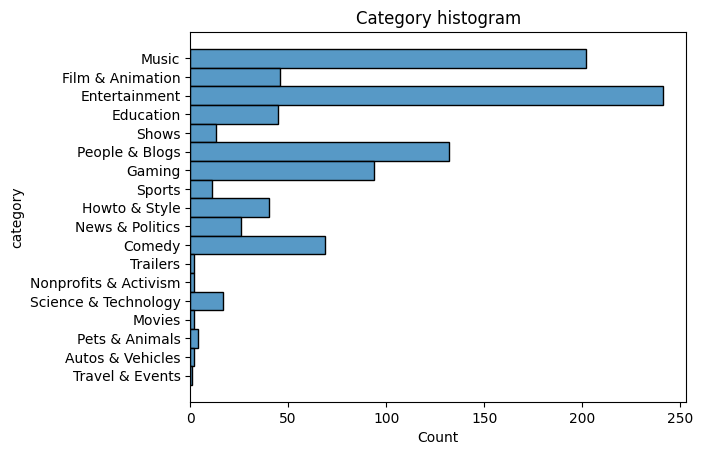

In [15]:
# Categorias com maior incidência
sns.histplot(data=data, y= 'category')
plt.title('Category histogram')

O conjunto de dados contem 19 categorias, incluindo valores nulos, sendo que a maior parte dos canais estão na categoria entreterimento, seguida de música.

In [16]:
# visualizando informações da coluna tipos de canal
data.value_counts(data['channel_type'], dropna=False)

channel_type
Entertainment    304
Music            216
People           101
Games             98
Comedy            51
Education         49
Film              42
Howto             36
News              30
NaN               30
Tech              17
Sports            13
Animals            3
Autos              3
Nonprofit          2
Name: count, dtype: int64

As informações da coluna Tipo de canal e categoria são semelhantes, mas a coluna categoria traz dados mais específicos

In [17]:
# Países que estão no conjunto de dados
data.value_counts(data['Country'])

Country
United States           313
India                   168
Brazil                   62
United Kingdom           43
Mexico                   33
Indonesia                28
Spain                    22
Thailand                 18
South Korea              17
Russia                   16
Canada                   15
Argentina                13
Philippines              12
Colombia                 11
Saudi Arabia              9
Australia                 9
Ukraine                   8
United Arab Emirates      7
Pakistan                  6
Germany                   6
France                    5
Japan                     5
Sweden                    4
Turkey                    4
Netherlands               3
Vietnam                   3
Jordan                    3
Chile                     3
Singapore                 3
Italy                     2
Iraq                      2
Egypt                     2
Ecuador                   2
Switzerland               1
Venezuela                 1
Afghanistan 

In [18]:
len(data['Country'].unique())

50

São 50 países presentes no dataset e o país com mais canais é os Estados Unidos da América, seguido da Índia e em 3º lugar o Brasil.

### Transformando os dados

In [49]:
# Renomeando coluna de visualização de vídeos para melhor utilização
data.rename(columns = {'video views' :'video_views'}, inplace = True)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 995 entries, 0 to 994
Data columns (total 28 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   rank                                     995 non-null    int64  
 1   Youtuber                                 995 non-null    object 
 2   subscribers                              995 non-null    int64  
 3   video_views                              995 non-null    float64
 4   category                                 949 non-null    object 
 5   Title                                    995 non-null    object 
 6   uploads                                  995 non-null    int64  
 7   Country                                  873 non-null    object 
 8   Abbreviation                             873 non-null    object 
 9   channel_type                             965 non-null    object 
 10  video_views_rank                         994 non-n

### Convertendo números para melhor visualização

In [50]:
# Convertendo datas para melhor visualização
#Ano
data['created_year'] = data['created_year'].replace().astype(int)
# dia
data['created_date'] = data['created_date'].replace().astype(int)
# Mês
data['created_month'] = data['created_month'].str.replace('Jan', '1').replace('Feb', '2').replace('Mar','3').replace('Apr','4').replace('May','5').replace('Jun','6').replace('Jul','7').replace('Aug','8').replace('Sep','9').replace('Oct','10').replace('Nov','11').replace('Dec','12')
data['created_month'] = data['created_month'].replace().astype(int)

Os números contidos nas colunas Subscribers e Video_views são muito grandes e isso pode atrapalhar na visualização. O mesmo acontece com a coluna Population,  Unemployment rate e Urban_population
Para isso vamos converter os números para valores mais acessíveis.

In [51]:
data['subscribers'] = data['subscribers'].astype(float)

In [52]:
#limitando formato float
# lembrando que a vírgula marca o separador de milhar e o ponto as casas deciamais (inverso do formato brasileiro)
pd.set_option('float_format','{:,.2f}'.format)

In [24]:
data.head(10)

,rank,Youtuber,subscribers,video_views,category,Title,uploads,Country,Abbreviation,channel_type,...,subscribers_for_last_30_days,created_year,created_month,created_date,Gross tertiary education enrollment (%),Population,Unemployment rate,Urban_population,Latitude,Longitude
0,1,T-Series,"245,000,000.00","228,000,000,000.00",Music,T-Series,20082,India,IN,Music,...,"2,000,000.00",2006,3,13,28.10,"1,366,417,754.00",5.36,"471,031,528.00",20.59,78.96
1,2,YouTube Movies,"170,000,000.00",0.00,Film & Animation,youtubemovies,1,United States,US,Games,...,NaN,2006,3,5,88.20,"328,239,523.00",14.70,"270,663,028.00",37.09,-95.71
2,3,MrBeast,"166,000,000.00","28,368,841,870.00",Entertainment,MrBeast,741,United States,US,Entertainment,...,"8,000,000.00",2012,2,20,88.20,"328,239,523.00",14.70,"270,663,028.00",37.09,-95.71
3,4,Cocomelon - Nursery Rhymes,"162,000,000.00","164,000,000,000.00",Education,Cocomelon - Nursery Rhymes,966,United States,US,Education,...,"1,000,000.00",2006,9,1,88.20,"328,239,523.00",14.70,"270,663,028.00",37.09,-95.71
4,5,SET India,"159,000,000.00","148,000,000,000.00",Shows,SET India,116536,India,IN,Entertainment,...,"1,000,000.00",2006,9,20,28.10,"1,366,417,754.00",5.36,"471,031,528.00",20.59,78.96
5,6,Music,"119,000,000.00",0.00,NaN,Music,0,NaN,NaN,Music,...,NaN,2013,9,24,NaN,NaN,NaN,NaN,NaN,NaN
6,7,ýýý Kids Diana Show,"112,000,000.00","93,247,040,539.00",People & Blogs,ýýý Kids Diana Show,1111,United States,US,Entertainment,...,NaN,2015,5,12,88.20,"328,239,523.00",14.70,"270,663,028.00",37.09,-95.71
7,8,PewDiePie,"111,000,000.00","29,058,044,447.00",Gaming,PewDiePie,4716,Japan,JP,Entertainment,...,NaN,2010,4,29,63.20,"126,226,568.00",2.29,"115,782,416.00",36.20,138.25
8,9,Like Nastya,"106,000,000.00","90,479,060,027.00",People & Blogs,Like Nastya Vlog,493,Russia,RU,People,...,"100,000.00",2016,1,14,81.90,"144,373,535.00",4.59,"107,683,889.00",61.52,105.32
9,10,Vlad and Niki,"98,900,000.00","77,180,169,894.00",Entertainment,Vlad and Niki,574,United States,US,Entertainment,...,"600,000.00",2018,4,23,88.20,"328,239,523.00",14.70,"270,663,028.00",37.09,-95.71


Pronto! Agora é possível enchergar melhor os números, mas ainda é possível melhorar mais

In [25]:
data.describe()

,rank,subscribers,video_views,uploads,video_views_rank,country_rank,channel_type_rank,video_views_for_the_last_30_days,lowest_monthly_earnings,highest_monthly_earnings,...,subscribers_for_last_30_days,created_year,created_month,created_date,Gross tertiary education enrollment (%),Population,Unemployment rate,Urban_population,Latitude,Longitude
count,995.00,995.00,995.00,995.00,994.00,879.00,962.00,939.00,995.00,995.00,...,658.00,995.00,995.00,995.00,872.00,872.00,872.00,872.00,872.00,872.00
mean,498.00,"22,982,412.06","11,039,537,052.04","9,187.13","554,248.90",386.05,745.72,"175,610,284.79","36,886.15","589,807.85",...,"349,079.13","2,012.64",6.46,15.77,63.63,"430,387,266.75",9.28,"224,214,981.63",26.63,-14.13
std,287.38,"17,526,105.34","14,110,844,376.83","34,151.35","1,362,782.21","1,232.24","1,944.39","416,378,166.21","71,858.72","1,148,622.48",...,"614,355.44",4.51,3.45,8.78,26.11,"472,794,722.46",4.89,"154,687,362.71",20.56,84.76
min,1.00,"12,300,000.00",0.00,0.00,1.00,1.00,1.00,1.00,0.00,0.00,...,1.00,"1,970.00",1.00,1.00,7.60,"202,506.00",0.75,"35,588.00",-38.42,-172.10
25%,249.50,"14,500,000.00","4,288,145,410.00",194.50,323.00,11.00,27.00,"20,137,500.00","2,700.00","43,500.00",...,"100,000.00","2,009.00",3.00,8.00,36.30,"83,355,411.00",5.27,"55,908,316.00",20.59,-95.71
50%,498.00,"17,700,000.00","7,760,819,588.00",729.00,915.50,51.00,65.50,"64,085,000.00","13,300.00","212,700.00",...,"200,000.00","2,013.00",7.00,16.00,68.00,"328,239,523.00",9.37,"270,663,028.00",37.09,-51.93
75%,746.50,"24,600,000.00","13,554,701,853.00","2,667.50","3,584.50",123.00,139.75,"168,826,500.00","37,900.00","606,800.00",...,"400,000.00","2,016.00",9.00,23.00,88.20,"328,239,523.00",14.70,"270,663,028.00",37.09,78.96
max,995.00,"245,000,000.00","228,000,000,000.00","301,308.00","4,057,944.00","7,741.00","7,741.00","6,589,000,000.00","850,900.00","13,600,000.00",...,"8,000,000.00","2,022.00",12.00,31.00,113.10,"1,397,715,000.00",14.72,"842,933,962.00",61.92,138.25


### Trabalhando com datas

In [53]:
# criando dataframe com quantidade de anos do canal
df_idade = data[['created_year', 'created_month', 'created_date']].reset_index()
df_idade.head()

,index,created_year,created_month,created_date
0,0,2006,3,13
1,1,2006,3,5
2,2,2012,2,20
3,3,2006,9,1
4,4,2006,9,20


In [54]:
df_idade['created_year'] = pd.to_datetime(df_idade['created_year'], format = '%Y')
df_idade['created_month'] = pd.to_datetime(df_idade['created_month'], format = '%m')
df_idade['created_date'] = pd.to_datetime(df_idade['created_date'], format = '%d')
df_idade.dtypes

index                     int64
created_year     datetime64[ns]
created_month    datetime64[ns]
created_date     datetime64[ns]
dtype: object

In [55]:
# criando coluna data completa
df_idade['created_year'] = df_idade['created_year'].dt.strftime('%Y')
df_idade['created_month'] = df_idade['created_month'].dt.strftime('%m')
df_idade['created_date'] = df_idade['created_date'].dt.strftime('%d')

In [56]:
idade = df_idade['created_year'] + '/' + df_idade['created_month'] + '/' + df_idade['created_date']
idade.head()

0    2006/03/13
1    2006/03/05
2    2012/02/20
3    2006/09/01
4    2006/09/20
dtype: object

In [57]:
idade = pd.to_datetime(idade).dt.date

In [58]:
from datetime import date
hoje = date.today()

In [59]:
diff = []
for i in idade:
    calculo = (hoje-i).days//365
    diff.append(calculo)

In [60]:
print(diff)

[17, 17, 11, 17, 17, 10, 8, 13, 7, 5, 9, 16, 9, 7, 17, 16, 3, 10, 17, 16, 15, 17, 11, 11, 10, 13, 15, 5, 14, 17, 16, 12, 8, 14, 14, 16, 8, 17, 6, 17, 9, 17, 16, 9, 10, 10, 16, 16, 16, 14, 17, 17, 12, 6, 17, 10, 15, 17, 15, 10, 15, 17, 7, 17, 12, 7, 10, 9, 5, 17, 18, 6, 12, 13, 11, 5, 5, 2, 8, 8, 17, 8, 10, 9, 14, 5, 8, 7, 16, 9, 12, 5, 6, 10, 6, 11, 8, 17, 17, 13, 9, 53, 10, 7, 12, 10, 10, 17, 11, 17, 11, 8, 7, 3, 13, 6, 12, 6, 10, 15, 17, 10, 5, 15, 17, 9, 9, 12, 15, 7, 7, 11, 10, 13, 12, 16, 10, 17, 11, 17, 17, 16, 6, 11, 11, 5, 9, 12, 14, 17, 9, 4, 17, 8, 14, 6, 6, 16, 7, 9, 11, 4, 11, 15, 15, 14, 17, 16, 7, 16, 12, 14, 16, 6, 7, 8, 10, 17, 2, 9, 12, 16, 11, 4, 9, 12, 12, 18, 18, 6, 15, 10, 14, 12, 15, 15, 8, 11, 11, 6, 6, 8, 5, 14, 12, 7, 11, 11, 7, 14, 8, 3, 2, 8, 4, 3, 17, 4, 5, 17, 15, 10, 12, 13, 10, 10, 4, 14, 17, 11, 7, 7, 13, 4, 8, 9, 9, 8, 14, 16, 9, 7, 7, 14, 17, 3, 14, 12, 13, 11, 12, 4, 13, 9, 2, 4, 4, 9, 14, 9, 15, 4, 14, 3, 5, 11, 7, 12, 11, 7, 8, 16, 11, 10, 9, 3, 11,

In [61]:
df_idade['data_completa'] = idade
df_idade['anos_canal'] = diff
df_idade.head(20)

,index,created_year,created_month,created_date,data_completa,anos_canal
0,0,2006,03,13,2006-03-13,17
1,1,2006,03,05,2006-03-05,17
2,2,2012,02,20,2012-02-20,11
3,3,2006,09,01,2006-09-01,17
4,4,2006,09,20,2006-09-20,17
5,5,2013,09,24,2013-09-24,10
6,6,2015,05,12,2015-05-12,8
7,7,2010,04,29,2010-04-29,13
8,8,2016,01,14,2016-01-14,7
9,9,2018,04,23,2018-04-23,5


<Axes: xlabel='anos_canal', ylabel='Count'>

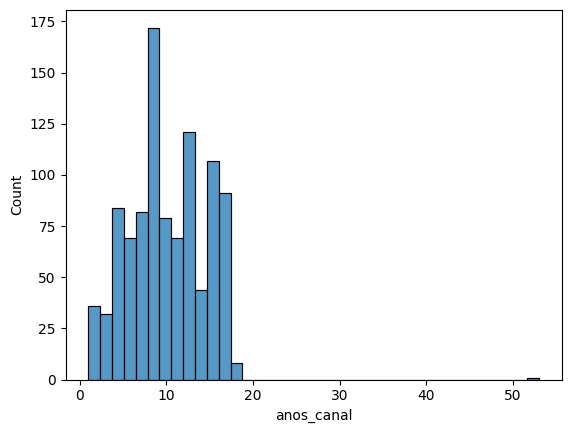

In [62]:
sns.histplot(data = df_idade, x = 'anos_canal')

Text(0.5, 1.0, 'Created Year')

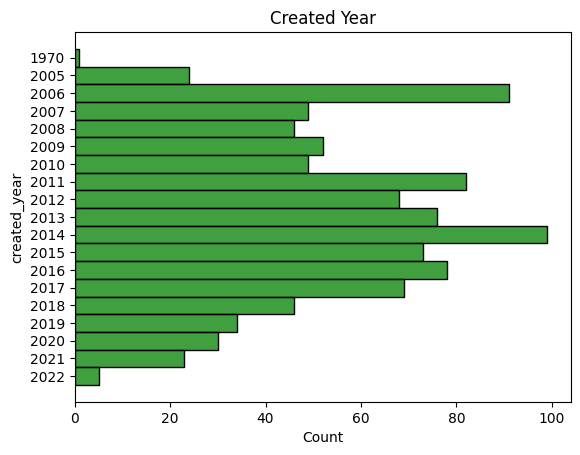

In [79]:
anos = df_idade.groupby('created_year').value_counts()
sns.histplot(data=anos, y= 'created_year', color= 'green')
plt.title('Created Year')

### Explorando os dados por categorias

In [64]:
# Visualizando a quantidade de categorias por porcentagem, existem canais que não possuem categorias
data['category'].value_counts(dropna=False, normalize=True)*100

category
Entertainment           24.22
Music                   20.30
People & Blogs          13.27
Gaming                   9.45
Comedy                   6.93
Film & Animation         4.62
NaN                      4.62
Education                4.52
Howto & Style            4.02
News & Politics          2.61
Science & Technology     1.71
Shows                    1.31
Sports                   1.11
Pets & Animals           0.40
Trailers                 0.20
Nonprofits & Activism    0.20
Movies                   0.20
Autos & Vehicles         0.20
Travel & Events          0.10
Name: proportion, dtype: float64

In [65]:
data.dtypes

rank                                         int64
Youtuber                                    object
subscribers                                float64
video_views                                float64
category                                    object
Title                                       object
uploads                                      int64
Country                                     object
Abbreviation                                object
channel_type                                object
video_views_rank                           float64
country_rank                               float64
channel_type_rank                          float64
video_views_for_the_last_30_days           float64
lowest_monthly_earnings                    float64
highest_monthly_earnings                   float64
lowest_yearly_earnings                     float64
highest_yearly_earnings                    float64
subscribers_for_last_30_days               float64
created_year                   

In [66]:
# Categorias com maiores visualizações de vídeos
categorias_visualizações = data[['video_views', 'category']].groupby('category', sort=True).sum().reset_index()

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17]),
 [Text(0, 0, 'Autos & Vehicles'),
  Text(1, 0, 'Comedy'),
  Text(2, 0, 'Education'),
  Text(3, 0, 'Entertainment'),
  Text(4, 0, 'Film & Animation'),
  Text(5, 0, 'Gaming'),
  Text(6, 0, 'Howto & Style'),
  Text(7, 0, 'Movies'),
  Text(8, 0, 'Music'),
  Text(9, 0, 'News & Politics'),
  Text(10, 0, 'Nonprofits & Activism'),
  Text(11, 0, 'People & Blogs'),
  Text(12, 0, 'Pets & Animals'),
  Text(13, 0, 'Science & Technology'),
  Text(14, 0, 'Shows'),
  Text(15, 0, 'Sports'),
  Text(16, 0, 'Trailers'),
  Text(17, 0, 'Travel & Events')])

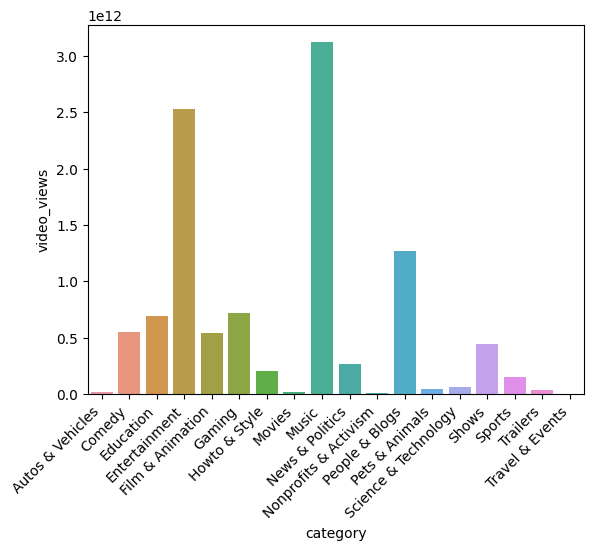

In [68]:
sns.barplot(data=categorias_visualizações, x = 'category', y='video_views', errorbar=("pi", 50))
plt.xticks(rotation=45,horizontalalignment='right')

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17]),
 [Text(0, 0, 'Music'),
  Text(1, 0, 'Film & Animation'),
  Text(2, 0, 'Entertainment'),
  Text(3, 0, 'Education'),
  Text(4, 0, 'Shows'),
  Text(5, 0, 'People & Blogs'),
  Text(6, 0, 'Gaming'),
  Text(7, 0, 'Sports'),
  Text(8, 0, 'Howto & Style'),
  Text(9, 0, 'News & Politics'),
  Text(10, 0, 'Comedy'),
  Text(11, 0, 'Trailers'),
  Text(12, 0, 'Nonprofits & Activism'),
  Text(13, 0, 'Science & Technology'),
  Text(14, 0, 'Movies'),
  Text(15, 0, 'Pets & Animals'),
  Text(16, 0, 'Autos & Vehicles'),
  Text(17, 0, 'Travel & Events')])

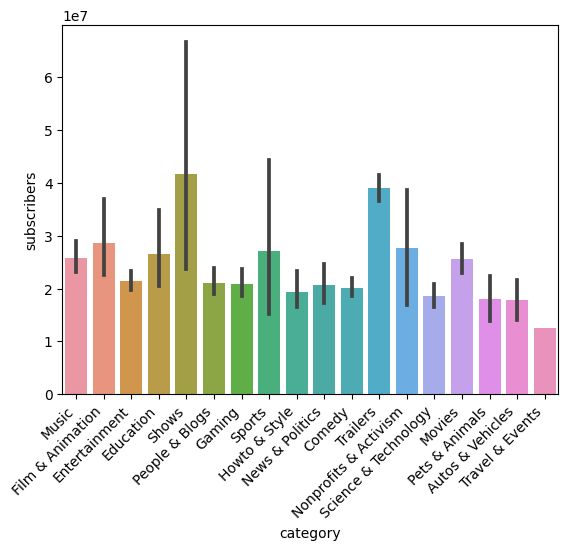

In [69]:
#categoria com maior número de inscritos
cat_subscribers = data[['category','subscribers']].reset_index()
sns.barplot(data = cat_subscribers, x = 'category', y ='subscribers')
plt.xticks(rotation=45,horizontalalignment='right')

C:\Users\mihvi\AppData\Local\Temp\ipykernel_8680\2909078194.py:5: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', False)` for the same effect.

  sns.barplot(data = data_brasil, x = 'video_views', y = 'category', ci = False)


<Axes: xlabel='video_views', ylabel='category'>

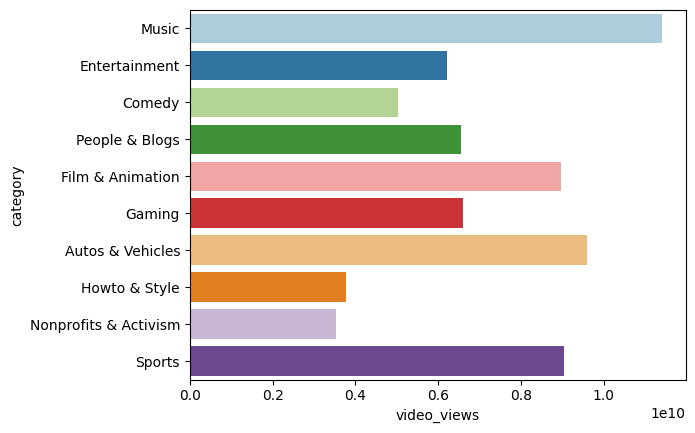

In [70]:
#Categorias mais visualizadas no Brasil
data_brasil = data[data['Country'] == 'Brazil'].reset_index()
data_brasil.groupby('category').sum()
sns.set_palette('Paired')
sns.barplot(data = data_brasil, x = 'video_views', y = 'category', ci = False)

### Quantidade de visualizações de vídeos

<Figure size 900x300 with 0 Axes>

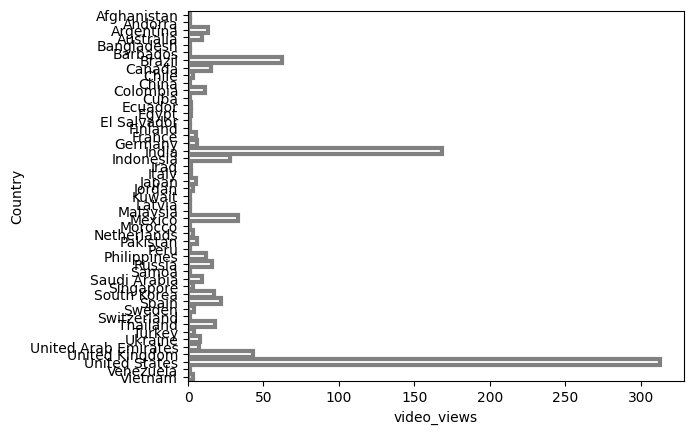

<Figure size 900x300 with 0 Axes>

In [71]:
#Canais por país com maiores visualizações de vídeos
country_video = data[['video_views', 'Country']].groupby('Country').count().reset_index()
sns.barplot(data=country_video, x = 'video_views', y = 'Country', errorbar = ('pi', 50), capsize = 4, errcolor = '.5', linewidth = 3, edgecolor = '0.5', facecolor = (0,0,0,0))
plt.figure(figsize=(9, 3))

In [72]:
# Canais com maiores visualizações de vídeos
data.sort_values(by=['video_views'], ascending=False)

,rank,Youtuber,subscribers,video_views,category,Title,uploads,Country,Abbreviation,channel_type,...,subscribers_for_last_30_days,created_year,created_month,created_date,Gross tertiary education enrollment (%),Population,Unemployment rate,Urban_population,Latitude,Longitude
0,1,T-Series,"245,000,000.00","228,000,000,000.00",Music,T-Series,20082,India,IN,Music,...,"2,000,000.00",2006,3,13,28.10,"1,366,417,754.00",5.36,"471,031,528.00",20.59,78.96
3,4,Cocomelon - Nursery Rhymes,"162,000,000.00","164,000,000,000.00",Education,Cocomelon - Nursery Rhymes,966,United States,US,Education,...,"1,000,000.00",2006,9,1,88.20,"328,239,523.00",14.70,"270,663,028.00",37.09,-95.71
4,5,SET India,"159,000,000.00","148,000,000,000.00",Shows,SET India,116536,India,IN,Entertainment,...,"1,000,000.00",2006,9,20,28.10,"1,366,417,754.00",5.36,"471,031,528.00",20.59,78.96
15,16,Sony SAB,"83,000,000.00","101,000,000,000.00",Shows,Sony SAB,71270,India,IN,Entertainment,...,"1,100,000.00",2007,8,4,28.10,"1,366,417,754.00",5.36,"471,031,528.00",20.59,78.96
6,7,ýýý Kids Diana Show,"112,000,000.00","93,247,040,539.00",People & Blogs,ýýý Kids Diana Show,1111,United States,US,Entertainment,...,NaN,2015,5,12,88.20,"328,239,523.00",14.70,"270,663,028.00",37.09,-95.71
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,174,Popular on YouTube,"29,300,000.00",0.00,NaN,Popular on Youtube,3,NaN,NaN,Education,...,NaN,2017,8,7,NaN,NaN,NaN,NaN,NaN,NaN
1,2,YouTube Movies,"170,000,000.00",0.00,Film & Animation,youtubemovies,1,United States,US,Games,...,NaN,2006,3,5,88.20,"328,239,523.00",14.70,"270,663,028.00",37.09,-95.71
102,103,News,"36,300,000.00",0.00,NaN,News,0,NaN,NaN,NaN,...,NaN,2013,9,9,NaN,NaN,NaN,NaN,NaN,NaN
360,361,Minecraft - Topic,"20,900,000.00",0.00,NaN,Minecraft - Topic,0,NaN,NaN,Games,...,"300,000.00",2013,12,20,NaN,NaN,NaN,NaN,NaN,NaN


In [73]:
# Função para Números legíveis
def num_legivel(x):
    #for x in data:
    if x >= 1000000000000:
        x = '{:1.1f}T'.format(x*1e-12)
    elif x >= 1000000000:
        x = '{:1.1f}B'.format(x*1e-9)
    elif x >= 1000000: 
        x = '{:1.1f}M'.format(x*1e-6)
    else:
        None
    return x

In [74]:
#aplicando a função
df = data
df['video_views'] = df['video_views'].apply(num_legivel)
df['subscribers'] = df['subscribers'].apply(num_legivel)
df['uploads'] = df['uploads'].apply(num_legivel)
df['Population'] = df['Population'].apply(num_legivel)
df['Urban_population'] = df['Urban_population'].apply(num_legivel)

In [78]:
df.head()

,rank,Youtuber,subscribers,video_views,category,Title,uploads,Country,Abbreviation,channel_type,...,subscribers_for_last_30_days,created_year,created_month,created_date,Gross tertiary education enrollment (%),Population,Unemployment rate,Urban_population,Latitude,Longitude
0,1,T-Series,245.0M,228.0B,Music,T-Series,20082,India,IN,Music,...,"2,000,000.00",2006,3,13,28.10,1.4B,5.36,471.0M,20.59,78.96
1,2,YouTube Movies,170.0M,0.00,Film & Animation,youtubemovies,1,United States,US,Games,...,NaN,2006,3,5,88.20,328.2M,14.70,270.7M,37.09,-95.71
2,3,MrBeast,166.0M,28.4B,Entertainment,MrBeast,741,United States,US,Entertainment,...,"8,000,000.00",2012,2,20,88.20,328.2M,14.70,270.7M,37.09,-95.71
3,4,Cocomelon - Nursery Rhymes,162.0M,164.0B,Education,Cocomelon - Nursery Rhymes,966,United States,US,Education,...,"1,000,000.00",2006,9,1,88.20,328.2M,14.70,270.7M,37.09,-95.71
4,5,SET India,159.0M,148.0B,Shows,SET India,116536,India,IN,Entertainment,...,"1,000,000.00",2006,9,20,28.10,1.4B,5.36,471.0M,20.59,78.96
